In [2]:
import numpy as np
from scipy.stats import norm, multivariate_normal, poisson, t
import matplotlib.pyplot as plt

In [3]:
np.exp(-np.linspace(5, 0,6))

array([0.00673795, 0.01831564, 0.04978707, 0.13533528, 0.36787944,
       1.        ])

Start by declaring some precision matrix.

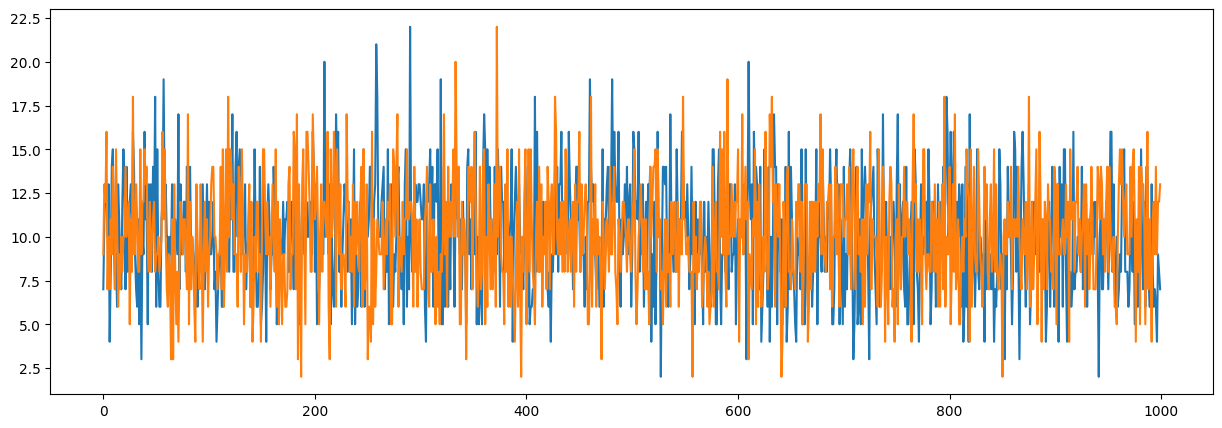

In [29]:
A = np.array([[3, 0, 0, -1, -0.5],
             [0, 2.5, -0.3, 0, 0],
             [0,-0.3, 2.5, 0, - 0.4],
             [-1, 0, 0, 3, 0],
             [-0.5, 0, -0.4, 0, 2]])



Cov = np.linalg.inv(A)
diag = np.diag(Cov)** (-1/2)
Cov = np.dot(np.diag(diag), Cov).dot(np.diag(diag))

d = A.shape[0]
n = 1000
y = np.zeros((n,d))
for i in range(n):
    x = multivariate_normal.rvs(mean = np.zeros(d), cov = Cov)
    for j in range(d):
        y[i,j] = poisson.ppf(norm.cdf(x[j]), mu = 10)

fig, ax = plt.subplots(1,1, figsize = (15,5))
plt.plot(y[:,:2])

Brute Force using scpy optim

In [31]:



def likelihood(param, y):

    d = y.shape[1]
    mu = param[0]
    theta = np.zeros((d,d))
    theta[np.triu_indices(d)] = param[1:]
    theta = theta + theta.T
    np.fill_diagonal(theta, np.diag(theta)/2)

    if np.any(np.linalg.eigvals(theta) <=0):
        return np.inf
    cov = np.linalg.inv(theta)


    u =  poisson.cdf(y, mu = mu) # t.cdf(y, loc = mu, df = 4) #
    t1 = np.sum(multivariate_normal.logpdf(norm.ppf(u), mean = np.zeros(d), cov = cov)) - np.sum(multivariate_normal.logpdf(norm.ppf(u), mean = np.zeros(d), cov = np.identity(d)))
    t2 = np.sum(poisson.logpmf(y, mu = mu)) #np.sum(poisson.logpdf(y, loc = mu, df = 4))# 

    return -t1-t2



In [32]:
from scipy.optimize import minimize

d = y.shape[1]

out = minimize(likelihood, np.concatenate(([np.mean(y)],np.identity(d)[np.triu_indices(d)])), args = (y, ))

c:\Users\User\anaconda3\envs\AQI\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [34]:
print(out.x)
theta = np.zeros((d,d))
theta[np.triu_indices(d)] = out.x[1:]
theta = theta + theta.T
np.fill_diagonal(theta, np.diag(theta)/2)
np.round(theta,2)

[ 9.47678004  1.09642843 -0.03931648 -0.06498997 -0.42838182 -0.15743115
  0.9709398  -0.19895932 -0.05806172 -0.1087781   1.09340912 -0.02824746
 -0.27424133  1.09980013 -0.09810879  1.13512152]


array([[ 1.1 , -0.04, -0.06, -0.43, -0.16],
       [-0.04,  0.97, -0.2 , -0.06, -0.11],
       [-0.06, -0.2 ,  1.09, -0.03, -0.27],
       [-0.43, -0.06, -0.03,  1.1 , -0.1 ],
       [-0.16, -0.11, -0.27, -0.1 ,  1.14]])

In [1]:
np.exp(-np.linspace(5, 0,6))

NameError: name 'np' is not defined

In [38]:
u =  poisson.cdf(y, mu = out.x[0]) # t.cdf(y, loc = mu, df = 4) #
t1 = np.sum(multivariate_normal.logpdf(norm.ppf(u), mean = np.zeros(d), cov = np.linalg.inv(theta))) - np.sum(multivariate_normal.logpdf(norm.ppf(u), mean = np.zeros(d), cov = np.identity(d)))
t2 = np.sum(poisson.logpmf(y, mu = out.x[0]))

t1+t2

-12629.220327888987

In [37]:
u =  poisson.cdf(y, mu = 5) # t.cdf(y, loc = mu, df = 4) #
t1 = np.sum(multivariate_normal.logpdf(norm.ppf(u), mean = np.zeros(d), cov = Cov)) - np.sum(multivariate_normal.logpdf(norm.ppf(u), mean = np.zeros(d), cov = np.identity(d)))
t2 = np.sum(poisson.logpmf(y, mu = 5))

t1+t2

-19139.682441855308